In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [52]:
df = pd.read_csv('pokedex.csv')

In [53]:
df.head()

,pokedex_id,sprite,pokemon_name,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,pokemon_type1,pokemon_type2,base_hapiness,color_group,egg_group,generation,shape
0,1,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png"" width=""60"" >",bulbasaur,69.0,7.0,45.0,65.0,65.0,49.0,49.0,45.0,poison,grass,70.0,green,plant,generation-i,quadruped
1,2,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/2.png"" width=""60"" >",ivysaur,130.0,10.0,60.0,80.0,80.0,63.0,62.0,60.0,poison,grass,70.0,green,plant,generation-i,quadruped
2,3,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/3.png"" width=""60"" >",venusaur,1000.0,20.0,80.0,100.0,100.0,83.0,82.0,80.0,poison,grass,70.0,green,plant,generation-i,quadruped
3,4,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png"" width=""60"" >",charmander,85.0,6.0,65.0,50.0,60.0,43.0,52.0,39.0,fire,NaN,70.0,red,dragon,generation-i,upright
4,5,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/5.png"" width=""60"" >",charmeleon,190.0,11.0,80.0,65.0,80.0,58.0,64.0,58.0,fire,NaN,70.0,red,dragon,generation-i,upright


In [54]:
# Average Stats by Groups
eggs = df.groupby('egg_group').mean().drop('pokedex_id',axis=1)
color = df.groupby('color_group').mean().drop('pokedex_id',axis=1)
generation = df.groupby('generation').mean().drop('pokedex_id',axis=1)
shape = df.groupby('shape').mean().drop('pokedex_id',axis=1)
type1 = df.groupby('pokemon_type1').mean().drop('pokedex_id',axis=1)

In [55]:
type1 = round(type1, 0).astype(int)
type1

,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness
pokemon_type1,,,,,,,,,
bug,174,7,48,52,41,61,56,53,70
dark,560,12,75,62,76,65,93,69,59
dragon,1608,20,67,75,79,78,88,75,43
electric,433,10,80,68,82,60,72,66,65
fairy,192,8,60,82,75,69,61,67,69
fighting,712,13,70,68,61,72,100,75,63
fire,431,10,74,67,82,59,75,64,66
flying,510,13,82,69,71,66,77,70,63
ghost,456,13,61,85,76,83,81,60,52


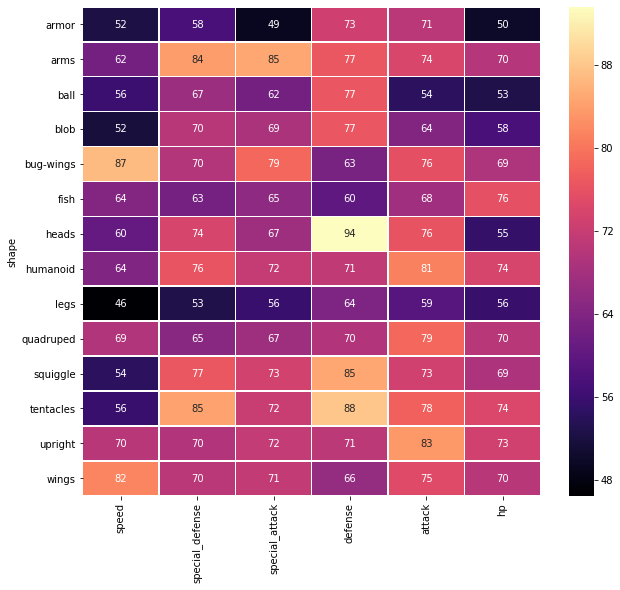

In [56]:
f, ax = plt.subplots(figsize=(9,8))

sns.heatmap(shape[['speed','special_defense', 'special_attack','defense','attack','hp']], annot=True, linewidths=.6, ax=ax, cmap='magma')
plt.tight_layout(pad=0)
plt.savefig('images/shapes_stat_matrix.png')


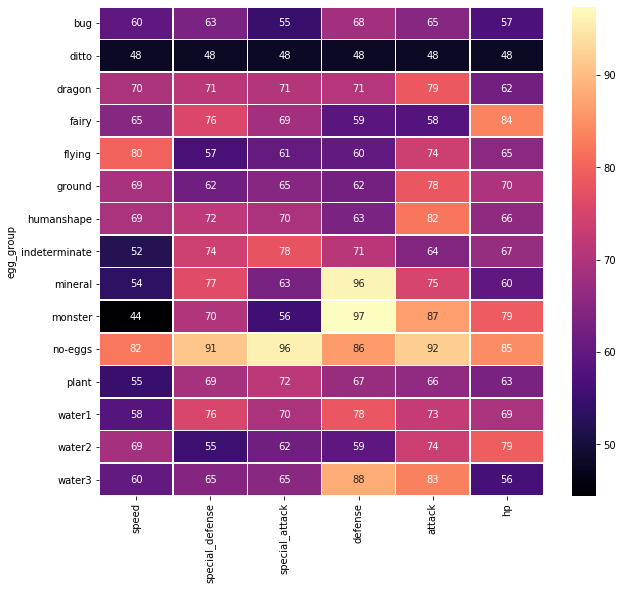

In [57]:
f, ax = plt.subplots(figsize=(9,8))

sns.heatmap(eggs[['speed','special_defense', 'special_attack','defense','attack','hp']], annot=True, linewidths=.6, ax=ax, cmap='magma')
plt.tight_layout(pad=0)
plt.savefig('images/egg_stat_matrix.png')

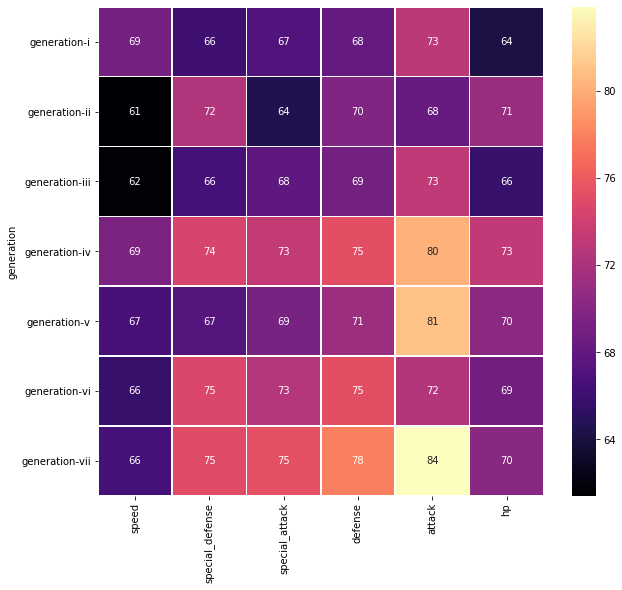

In [58]:
f, ax = plt.subplots(figsize=(9,8))

sns.heatmap(generation[['speed','special_defense', 'special_attack','defense','attack','hp']], annot=True, linewidths=.6, ax=ax, cmap='magma')
plt.tight_layout(pad=0)
plt.savefig('images/generation_stat_matrix.png')

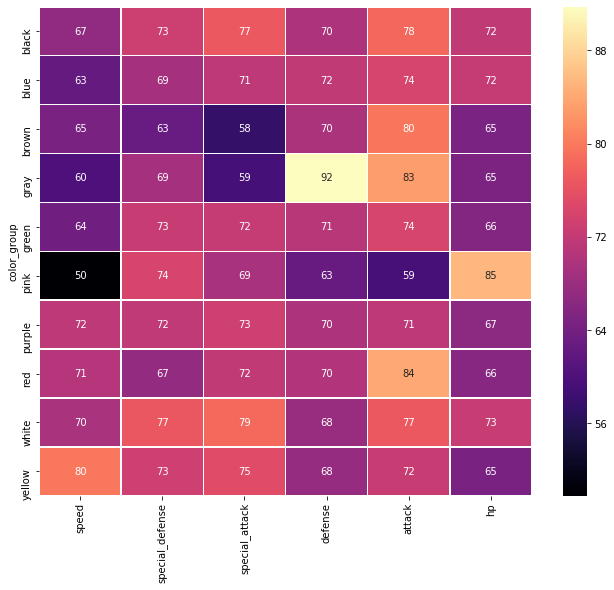

In [59]:
f, ax = plt.subplots(figsize=(9,8))

sns.heatmap(color[['speed','special_defense', 'special_attack','defense','attack','hp']], annot=True, linewidths=.6, ax=ax, cmap='magma')
plt.tight_layout(pad=0)
plt.savefig('images/color_stat_matrix.png')

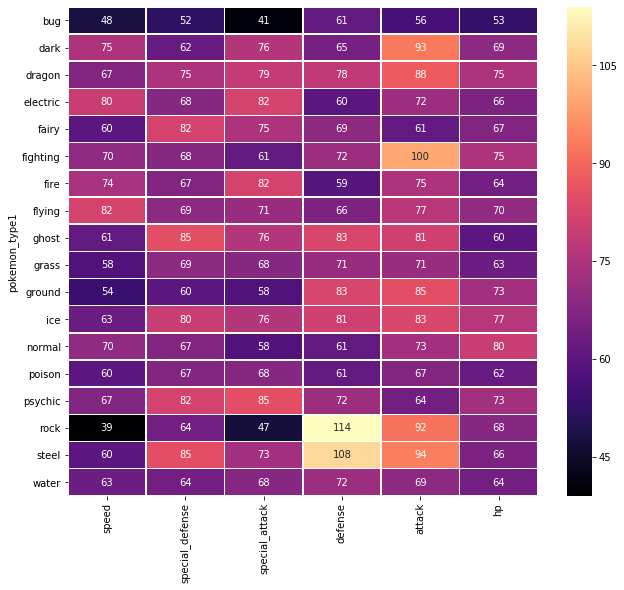

In [60]:
f, ax = plt.subplots(figsize=(9,8))

sns.heatmap(type1[['speed','special_defense', 'special_attack','defense','attack','hp']], annot=True, linewidths=.6, ax=ax, cmap='magma', fmt='g')
plt.tight_layout(pad=0)
plt.savefig('images/type1_stat_matrix.png')

In [24]:
#Best Shape Group

shape['Total'] = shape[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
shape = shape.sort_values('Total', ascending=False)
shape = shape.reset_index()
shape

,shape,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness,Total
0,tentacles,1154.777778,13.555556,55.777778,84.555556,72.166667,88.055556,77.944444,74.277778,58.333333,452.777778
1,arms,404.133333,9.600000,62.488889,84.000000,84.844444,76.844444,74.222222,69.866667,68.111111,452.266667
2,bug-wings,344.315789,12.000000,86.789474,69.789474,78.684211,62.947368,75.631579,69.157895,70.000000,443.000000
3,upright,648.369048,11.863095,70.375000,69.589286,71.648810,70.678571,83.470238,72.994048,67.232143,438.755952
4,humanoid,620.967742,11.395161,63.959677,76.314516,71.838710,71.225806,81.129032,73.846774,62.177419,438.314516
5,wings,426.625000,12.819444,81.555556,70.486111,71.333333,66.222222,74.916667,70.125000,60.833333,434.638889
6,squiggle,858.125000,24.968750,54.375000,76.718750,73.312500,84.812500,73.156250,69.031250,61.093750,431.406250
7,heads,897.400000,8.266667,60.466667,73.733333,67.333333,93.600000,76.133333,55.266667,67.666667,426.533333
8,quadruped,757.266667,11.360000,69.326667,64.953333,67.353333,69.666667,78.533333,70.240000,63.300000,420.073333
9,fish,559.250000,14.527778,64.166667,62.583333,65.444444,60.000000,67.611111,75.777778,66.111111,395.583333


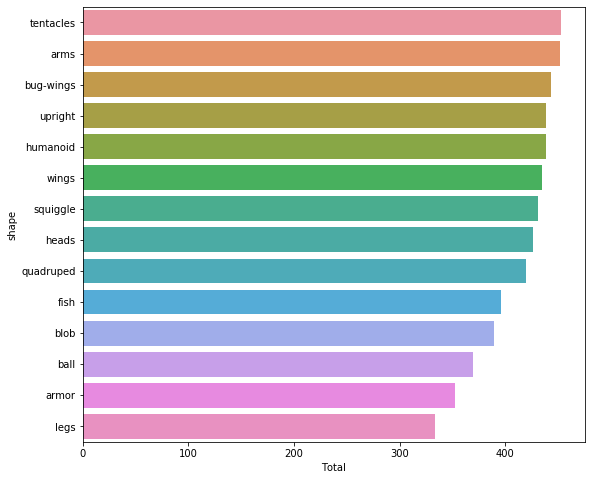

In [80]:
f, ax = plt.subplots(figsize=(9,8))
sns.barplot(x=shape['Total'], y=shape['shape'])
plt.savefig('images/shape_bar_total.png')

In [25]:
#Best Egg Group

eggs['Total'] = eggs[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
eggs = eggs.sort_values('Total', ascending=False)
eggs = eggs.reset_index()
eggs

,egg_group,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness,Total
0,no-eggs,1579.642857,19.071429,82.316327,91.061224,95.765306,86.387755,91.775510,84.561224,43.724490,531.867347
1,monster,1479.100000,13.550000,44.450000,70.100000,55.800000,97.350000,86.650000,78.950000,59.500000,433.300000
2,mineral,1072.370370,13.074074,53.629630,76.685185,63.000000,96.185185,75.111111,59.907407,68.055556,424.518519
3,water1,459.766667,11.200000,58.366667,75.600000,69.600000,78.233333,72.866667,69.300000,70.000000,423.966667
4,dragon,640.000000,15.403846,69.615385,71.365385,70.692308,70.846154,78.596154,62.192308,59.230769,423.307692
5,humanshape,469.442308,11.173077,69.365385,71.750000,69.615385,63.269231,82.096154,66.076923,67.211538,422.173077
6,water3,429.333333,9.818182,60.060606,64.606061,65.272727,88.060606,83.393939,56.363636,70.000000,417.757576
7,fairy,135.794118,6.529412,64.764706,75.823529,68.529412,59.117647,58.117647,83.647059,79.117647,410.000000
8,ground,450.453552,9.825137,69.191257,61.863388,65.081967,62.327869,78.404372,69.841530,68.797814,406.710383
9,indeterminate,314.923077,9.480769,52.192308,73.807692,77.865385,71.211538,64.211538,66.615385,62.596154,405.903846


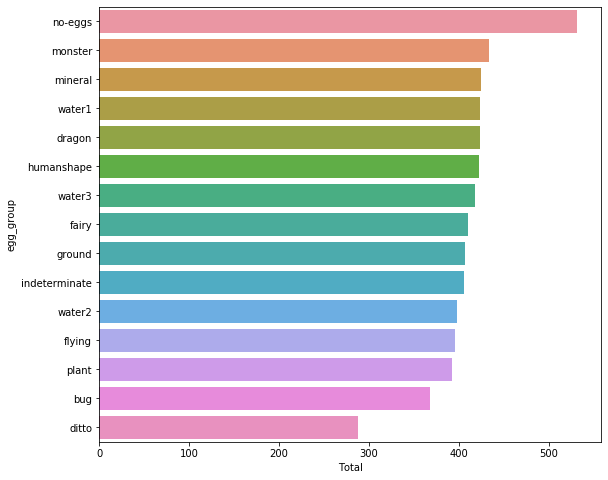

In [83]:
f, ax = plt.subplots(figsize=(9,8))
sns.barplot(x=eggs['Total'], y=eggs['egg_group'])
plt.savefig('images/eggs_bar_total.png')

In [26]:
#Best Generation Group

generation['Total'] = generation[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
generation = generation.sort_values('Total', ascending=False)
generation = generation.reset_index()
generation

,generation,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness,Total
0,generation-vii,932.023529,13.376471,66.470588,75.023529,75.364706,77.882353,83.847059,70.211765,52.705882,448.800000
1,generation-iv,768.850467,11.336449,69.476636,74.476636,73.280374,75.205607,80.214953,73.102804,68.037383,445.757009
2,generation-vi,514.013889,10.680556,65.680556,74.722222,72.541667,75.222222,72.500000,68.916667,66.458333,429.583333
3,generation-v,524.025641,10.320513,66.596154,67.333333,69.243590,71.237179,81.032051,70.314103,65.608974,425.756410
4,generation-i,459.516556,11.947020,69.066225,66.086093,67.139073,68.225166,72.913907,64.211921,69.735099,407.642384
5,generation-ii,491.050000,11.630000,61.410000,72.340000,64.500000,69.690000,68.260000,70.980000,66.100000,407.180000
6,generation-iii,670.777778,12.296296,61.614815,66.466667,67.859259,69.007407,73.111111,65.666667,61.962963,403.725926


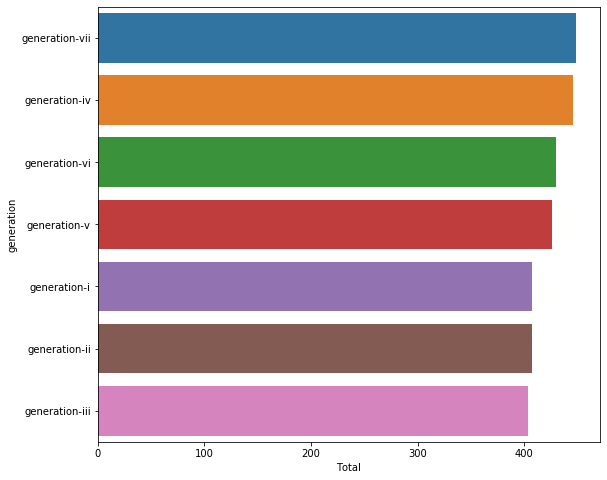

In [85]:
f, ax = plt.subplots(figsize=(9,8))
sns.barplot(x=generation['Total'], y=generation['generation'])
plt.savefig('images/generations_bar_total.png')

In [27]:
#Best Color Group

color['Total'] = color[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
color = color.sort_values('Total', ascending=False)
color = color.reset_index()
color

,color_group,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness,Total
0,white,744.761905,13.539683,69.539683,76.793651,78.603175,67.761905,76.936508,72.555556,56.507937,442.190476
1,black,930.600000,13.275000,67.075000,72.950000,76.900000,69.800000,78.425000,71.800000,48.125000,436.950000
2,yellow,338.338235,9.352941,79.808824,73.058824,75.323529,67.558824,72.441176,64.588235,68.235294,432.779412
3,red,666.390244,11.926829,70.670732,67.158537,71.768293,70.378049,84.170732,66.121951,64.695122,430.268293
4,gray,855.896104,12.389610,59.948052,69.090909,59.194805,91.740260,83.103896,64.961039,61.363636,428.038961
5,purple,424.080000,11.666667,71.573333,71.733333,73.080000,69.893333,71.453333,66.666667,62.866667,424.400000
6,blue,666.841379,12.082759,62.531034,69.089655,71.482759,71.889655,74.200000,72.365517,65.379310,421.558621
7,green,602.310345,12.436782,63.563218,72.517241,72.321839,70.931034,74.091954,65.643678,65.287356,419.068966
8,pink,304.404255,9.808511,49.787234,74.276596,69.319149,62.638298,59.340426,85.404255,81.063830,400.765957
9,brown,544.163934,10.114754,64.614754,62.844262,57.639344,69.770492,79.614754,64.778689,69.221311,399.262295


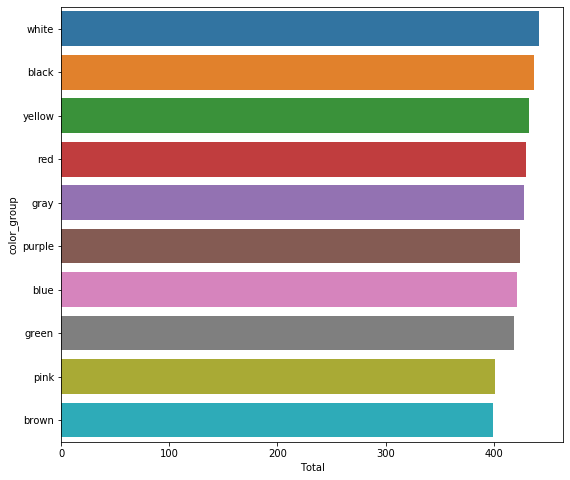

In [89]:
f, ax = plt.subplots(figsize=(9,8))
sns.barplot(x=color['Total'], y=color['color_group'])
plt.savefig('images/color_bar_total.png')

In [28]:
#Best Type Group

type1['Total'] = type1[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
type1 = type1.sort_values('Total', ascending=False)
type1 = type1.reset_index()
type1

,pokemon_type1,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,base_hapiness,Total
0,steel,1264,12,60,85,73,108,94,66,57,486
1,dragon,1608,20,67,75,79,78,88,75,43,462
2,ice,1337,15,63,80,76,81,83,77,61,460
3,fighting,712,13,70,68,61,72,100,75,63,446
4,ghost,456,13,61,85,76,83,81,60,52,446
5,psychic,706,10,67,82,85,72,64,73,69,443
6,dark,560,12,75,62,76,65,93,69,59,440
7,flying,510,13,82,69,71,66,77,70,63,435
8,electric,433,10,80,68,82,60,72,66,65,428
9,rock,961,11,39,64,47,114,92,68,64,424


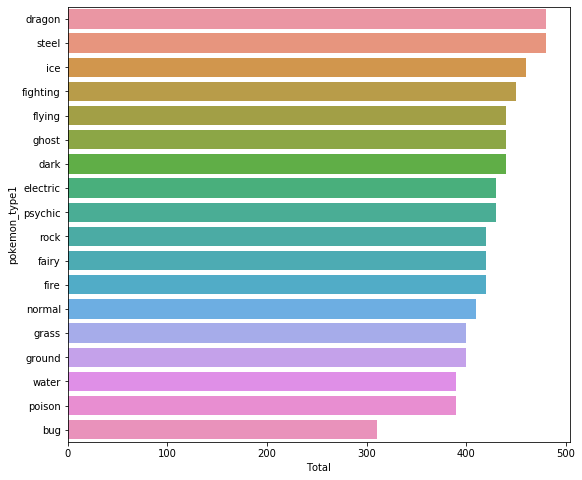

In [91]:
f, ax = plt.subplots(figsize=(9,8))
sns.barplot(x=type1['Total'], y=type1['pokemon_type1'])
plt.savefig('images/type1_bar_total.png')

In [29]:
df['Total'] = df[['speed','special_defense', 'special_attack','defense','attack','hp']].sum(axis=1)
df.head()

,pokedex_id,sprite,pokemon_name,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,pokemon_type1,pokemon_type2,base_hapiness,color_group,egg_group,generation,shape,Total
0,1,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png"" width=""60"" >",bulbasaur,69.0,7.0,45.0,65.0,65.0,49.0,49.0,45.0,poison,grass,70.0,green,plant,generation-i,quadruped,318.0
1,2,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/2.png"" width=""60"" >",ivysaur,130.0,10.0,60.0,80.0,80.0,63.0,62.0,60.0,poison,grass,70.0,green,plant,generation-i,quadruped,405.0
2,3,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/3.png"" width=""60"" >",venusaur,1000.0,20.0,80.0,100.0,100.0,83.0,82.0,80.0,poison,grass,70.0,green,plant,generation-i,quadruped,525.0
3,4,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png"" width=""60"" >",charmander,85.0,6.0,65.0,50.0,60.0,43.0,52.0,39.0,fire,NaN,70.0,red,dragon,generation-i,upright,309.0
4,5,"<img src=""https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/5.png"" width=""60"" >",charmeleon,190.0,11.0,80.0,65.0,80.0,58.0,64.0,58.0,fire,NaN,70.0,red,dragon,generation-i,upright,405.0


In [30]:
poke_shape = df.groupby(['shape','pokemon_name','sprite'])['Total'].mean()
best_shape = pd.DataFrame(poke_shape).reset_index().sort_values(['shape','Total'], ascending=False)
best_shape = best_shape.groupby('shape').head(5).set_index('shape')

In [31]:
poke_egg = df.groupby(['egg_group','pokemon_name','sprite'])['Total'].mean()
best_egg = pd.DataFrame(poke_egg).reset_index().sort_values(['egg_group','Total'], ascending=False)
best_egg = best_egg.groupby('egg_group').head(5).set_index('egg_group')

In [36]:
poke_generation = df.groupby(['generation','pokemon_name','sprite'])['Total'].mean()
best_generation = pd.DataFrame(poke_generation).reset_index().sort_values(['generation','Total'], ascending=False)
best_generation = best_generation.groupby('generation').head(5).set_index('generation')

In [33]:
poke_color = df.groupby(['color_group','pokemon_name','sprite'])['Total'].mean()
best_color = pd.DataFrame(poke_color).reset_index().sort_values(['color_group','Total'], ascending=False)
best_color = best_color.groupby('color_group').head(5).set_index('color_group')

In [34]:
poke_type1 = df.groupby(['pokemon_type1','pokemon_name','sprite'])['Total'].mean()
best_type1 = pd.DataFrame(poke_type1).reset_index().sort_values(['pokemon_type1','Total'], ascending=False)
best_type1 = best_type1.groupby('pokemon_type1').head(5).set_index('pokemon_type1')

In [35]:
arceus = df.loc[df['pokemon_name'] == 'arceus']

In [18]:
arceus

,pokedex_id,sprite,pokemon_name,pokemon_weight,pokemon_height,speed,special_defense,special_attack,defense,attack,hp,pokemon_type1,pokemon_type2,base_hapiness,color_group,egg_group,generation,shape,Total
492,493,"<img src=""https://raw.githubusercontent.com/Po...",arceus,3200.0,32.0,120.0,120.0,120.0,120.0,120.0,120.0,normal,NaN,0.0,white,no-eggs,generation-iv,quadruped,720.0


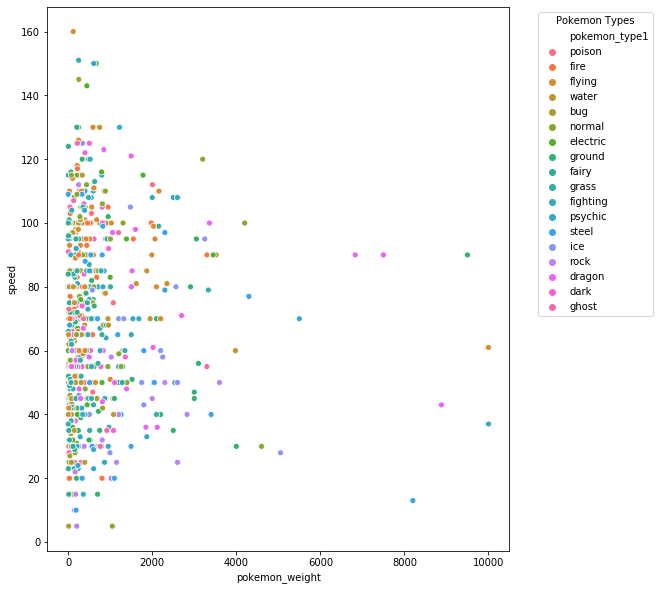

In [61]:
weight_speed = df[['pokemon_name','pokemon_weight','speed','pokemon_type1']]
f, ax = plt.subplots(figsize=(9,8))
sns.scatterplot(x=weight_speed['pokemon_weight'],y=weight_speed['speed'],hue=weight_speed['pokemon_type1'], ax=ax)
ax.legend(bbox_to_anchor=(1.05,1),loc=2, title='Pokemon Types')
plt.tight_layout(pad=0)
plt.savefig('images/weight_speed_scatter.png')

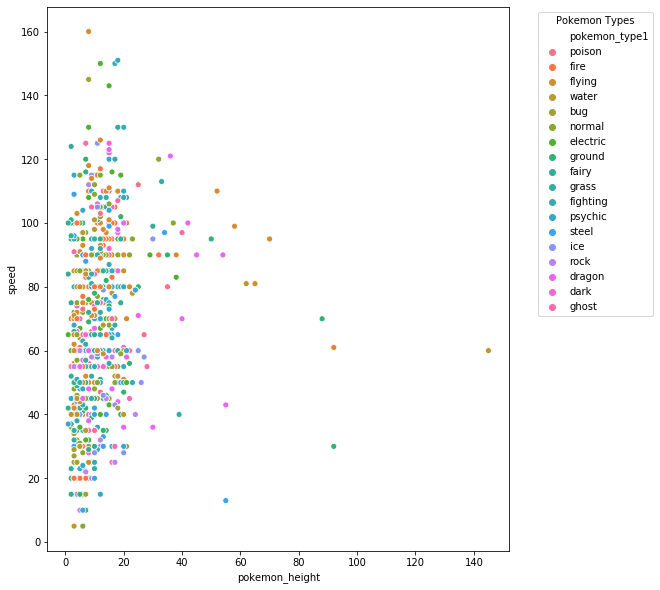

In [47]:
height_speed = df[['pokemon_name','pokemon_height','speed','pokemon_type1']]
f, ax = plt.subplots(figsize=(9,8))
sns.scatterplot(x=height_speed['pokemon_height'],y=height_speed['speed'],hue=height_speed['pokemon_type1'], ax=ax)
ax.legend(bbox_to_anchor=(1.05,1),loc=2, title='Pokemon Types')
plt.tight_layout(pad=0)
plt.savefig('images/height_speed_scatter.png')

In [41]:
from IPython.core.display import HTML
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [42]:
HTML(best_shape.to_html('shape_table.html',escape=False ,formatters=dict(image=path_to_image_html)))

<IPython.core.display.HTML object>

In [44]:
HTML(best_egg.to_html('egg_table.html',escape=False ,formatters=dict(image=path_to_image_html)))

<IPython.core.display.HTML object>

In [45]:
HTML(best_generation.to_html('generations_table.html',escape=False ,formatters=dict(image=path_to_image_html)))

<IPython.core.display.HTML object>

In [46]:
HTML(best_type1.to_html('type1_table.html',escape=False ,formatters=dict(image=path_to_image_html)))

<IPython.core.display.HTML object>